In [0]:
from fastai.vision import *

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os

os.chdir("drive/My Drive/Colab/")

 **impot**

import os

os.chdir("drive/My Drive/Colab/")

**load drive**

from google.colab import drive

drive.mount('/content/drive/')

In [0]:
path = Path('fastai_pdl2019/lesson2/sharks')

In [5]:
path.ls()

[PosixPath('fastai_pdl2019/lesson2/sharks/hammer_shark.txt'),
 PosixPath('fastai_pdl2019/lesson2/sharks/white_shark.txt'),
 PosixPath('fastai_pdl2019/lesson2/sharks/teddy'),
 PosixPath('fastai_pdl2019/lesson2/sharks/white'),
 PosixPath('fastai_pdl2019/lesson2/sharks/hammer'),
 PosixPath('fastai_pdl2019/lesson2/sharks/teddy_shark.txt'),
 PosixPath('fastai_pdl2019/lesson2/sharks/models'),
 PosixPath('fastai_pdl2019/lesson2/sharks/cleaned.csv')]

In [0]:
folder = 'white'
file = 'white_shark.txt'
dest = path/folder

In [0]:
folder = 'hammer'
file = 'hammer_shark.txt'
dest = path/folder

In [0]:
folder = 'teddy'
file = 'teddy_shark.txt'
dest = path/folder

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://www.extra-imagens.com.br/brinquedos/Pelucias/Bichinhos/12685873/900611254/tubarao-branco-de-pelucia-gigante-shark-animais-marinhos-12685873.jpg HTTPSConnectionPool(host='www.extra-imagens.com.br', port=443): Read timed out. (read timeout=4)
Error https://www.pontofrio-imagens.com.br/brinquedos/Pelucias/Bichinhos/10742880/624273537/Pelucia-Tubarao---Fundo-do-Mar---Unik-Toys-10742880.jpg HTTPSConnectionPool(host='www.pontofrio-imagens.com.br', port=443): Read timed out. (read timeout=4)
Error https://www.extra-imagens.com.br/brinquedos/Pelucias/Bichinhos/10742841/624298447/Pelucia-Tubarao---Fundo-do-Mar---Unik-Toys-10742841.jpg HTTPSConnectionPool(host='www.extra-imagens.com.br', port=443): Read timed out. (read timeout=4)
Error https://www.pontofrio-imagens.com.br/brinquedos/Pelucias/Bichinhos/10742849/962062363/pelucia-tubarao-fundo-do-mar-unik-toys-10742849.jpg HTTPSConnectionPool(host='www.pontofrio-imagens.com.br', port=443): Read timed out. (read timeout=4)
Error http

In [0]:
classes = ['teddy','hammer','white']

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddy


hammer


white


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['hammer', 'teddy', 'white']

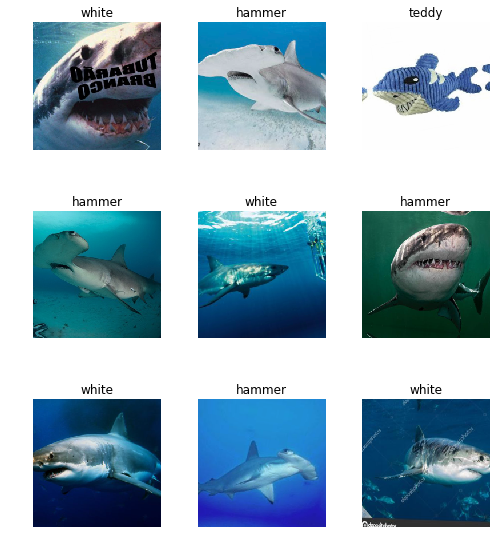

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [23]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['hammer', 'teddy', 'white'], 3, 295, 73)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [34]:
learn.fit_one_cycle(4, max_lr=0.004)

epoch,train_loss,valid_loss,error_rate,time
0,1.336384,0.452619,0.164384,00:05
1,0.886441,0.390991,0.109589,00:05
2,0.658040,0.332907,0.109589,00:05
3,0.535934,0.284297,0.095890,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in 

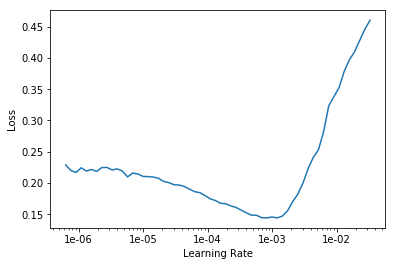

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.213930,0.274893,0.109589,00:05
1,0.204809,0.264131,0.095890,00:06
2,0.182794,0.247549,0.095890,00:06
3,0.161140,0.241961,0.082192,00:06


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

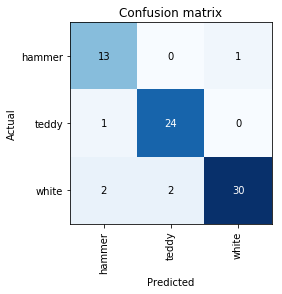

In [43]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)